In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
# Define paths to your train, validation and test sets
train_dir = "C:/Users/Abd ur Rehman/Desktop/Train"
val_dir = "C:/Users/Abd ur Rehman/Desktop/val"
test_dir = "C:/Users/Abd ur Rehman/Desktop/Test"

In [4]:
# Define image size and batch size
img_size = (224, 224)
batch_size = 32

In [5]:
# Define data generator for train, validation and test sets
train_datagen = ImageDataGenerator(rescale=1./255)
train_data = train_datagen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size, class_mode='binary')
val_datagen = ImageDataGenerator(rescale=1./255)
val_data = val_datagen.flow_from_directory(val_dir, target_size=img_size, batch_size=batch_size, class_mode='binary')
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(test_dir, target_size=img_size, batch_size=batch_size, class_mode='binary')

Found 40 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 15 images belonging to 2 classes.


In [6]:
# Load pre-trained VGG-16 model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [7]:
# Freeze pre-trained layers
for layer in vgg16_model.layers:
    layer.trainable = False

In [8]:
# Build model
model = Sequential()
model.add(vgg16_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [9]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='accuracy', patience=2, verbose=1)

Epoch 1/5
2/2 [==============================] - 28s 13s/step - loss: 0.2657 - accuracy: 0.9250 - val_loss: 0.2859 - val_accuracy: 0.9500
Epoch 2/5
2/2 [==============================] - 28s 13s/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0839 - val_accuracy: 0.9500
Epoch 3/5
2/2 [==============================] - 28s 24s/step - loss: 0.3008 - accuracy: 0.9250 - val_loss: 0.0989 - val_accuracy: 0.9500
Epoch 4/5
2/2 [==============================] - 28s 13s/step - loss: 0.0539 - accuracy: 0.9750 - val_loss: 0.3658 - val_accuracy: 0.9500
Epoch 5/5
2/2 [==============================] - 28s 24s/step - loss: 0.0149 - accuracy: 1.0000 - val_loss: 0.6029 - val_accuracy: 0.9000


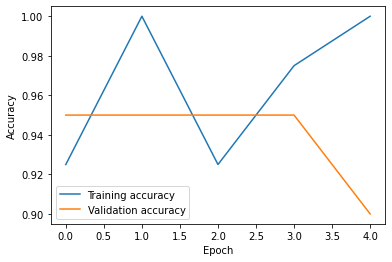

In [15]:
# Train model
history = model.fit(train_data, epochs=5, batch_size=10, validation_data=val_data)

import matplotlib.pyplot as plt

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
# Evaluate model
test_loss, test_acc = model.evaluate(test_data)
print('Test accuracy:', test_acc)

1/1 [==============================] - 7s 7s/step - loss: 0.0100 - accuracy: 1.0000
Test accuracy: 1.0


1/1 [==============================] - 1s 957ms/step
This is Male [1.]


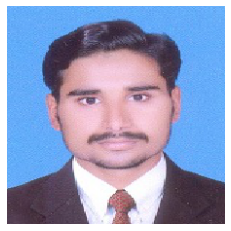

In [17]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load a test image
img_path = 'C:/Users/Abd ur Rehman/Desktop/Test/Male/22-ADP-22.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0

# Predict the class probabilities
preds = model.predict(x)

# Print the predicted class and probability
if preds[0] > 0.5:
    print("This is Male", preds[0])
else:
    print("This is Female", 1-preds[0])
    
    
# Show the image with predicted label
plt.imshow(img)
plt.axis('off')
plt.show()